# Configuration

I have an  virtual environment which is called env. You can easily activate it by using this code line. "env\Scripts\activate" or you can create your own environment and then uploaded all the packages that are listed on requirements.txt folder to this environment by using this code: "pip install -r requirements.txt"  After doing this all the code should work properly.

# <b>Task 1 – Story</b>


<b>About the Organization</b>


The World Health Organization (WHO) is a specialized agency of the United Nations responsible for international public health. It was established on April 7, 1948, and is headquartered in Geneva, Switzerland. WHO's primary role is to coordinate international health efforts, provide technical support, set norms and standards, and conduct research to improve global health outcomes. 

# <b>Story</b>

Recently, The World Health Organization has secured a significant budget of $50 million through financial initiatives. Now, the CEO must determine the most effective way to utilize these funds. The primary challenge is identifying the countries in most urgent need of assistance.

As a volunteer data analyst, my task is to evaluate countries using various socio-economic and health indicators to assess their development status. Subsequently, I will recommend to the CEO the top 10 countries that are in dire need of help.

# <b>Task 2 – The Data</b>


[SOURCE OF THE DATA (www.kaggle.com)](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)


As the website requires signing in unless you don't have an account, I have also included the data file itself.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler



# Loading Dataset

In [2]:
data = pd.read_csv('../data/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Data Explanation

 Features in this dataset offer several parts of socioeconomic indicators and can be utilized for investigating and understanding the counties' financial and developmental standing.

*The definition of Columns:*
- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health** : Total health spending per capita. Given as %age of GDP per capita
- **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income** : Net income per person
- **Inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec**: The average number of years a new born child would live if the current mortality patterns are to remain the same.
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population. GDP per capita is the sum of gross value added by all resident producers in the economy plus any product taxes (less subsidies) not included in the valuation of output, divided by mid-year population.
##### Each country in the dataset is accompanied by 9 distinct features.


# Data Eligibility for the Project

I have to suggest to the CEO the top 10 countries that should be prioritized for attention and support. These countries are the ones most in need of assistance. To create the most useful list, I must identify a subset of countries from the dataset that are most in need of help.
 
It is well understood that undeveloped and poor countries generally need more help than developed ones, though there are exceptions. The dataset contains 9 features, and some of these, such as income, GDP per capita, inflation, and child mortality, can significantly distinguish between developed and undeveloped countries.
 
By analyzing the relevant data, I can use the features mentioned above to identify and list the countries most in need of help. Therefore, the dataset is well-suited for the project described in Task 1.


# <b>Task 3 – IDA(Initial Data Analysis)</b>


### 3.1 Data Overview

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### 3.2 The number of Dimensions

In [5]:
print(f'The number of rows: {data.shape[0]}')
print(f'The number of columns: {data.shape[1]}')



The number of rows: 167
The number of columns: 10


### 3.4 Checking datatypes

In [6]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

The result indicates that the Country column contains strings that represent country names.

### 3.5 Checking Missing Values

In [7]:
print("Missing values:")
print(data.isna().sum())


Missing values:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


No null values are present in the data.

### 3.6 Checking for duplicating values 

In [8]:
print(f"The number of duplicate rows: {len(data[data.duplicated()])}")


The number of duplicate rows: 0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The outcome shows that there are no missing values (NaN) in the dataset, and it also underscores that the 'country' column specifically contains strings.

Are there duplicate values?


In [10]:
print(f"The number of duplicate rows: {len(data[data.duplicated()])}")


The number of duplicate rows: 0


In [11]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Observations:


The dataset is compact. It consists of 167 rows and 10 columns, with the index ranging from 0 to 167, incrementing by one. Additionally, there are no missing values (NaN) present in the dataset. The dataset contains columns with various data types, including object, float, and integer. All features except for the 'country' column are numerical. Therefore, the country column is considered a categorical feature.

# <b>Task 4 – Pitch Meeting</b>


* The Pitch Meeting was held at his time on April 16, 2024.

# <b>Task 5 – EDA(Exploratory Data Analysis) and Preprocessing</b>


In [12]:
categorical_features = ['country']
numerical_features = [col for col in data.columns if col not in categorical_features]

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: country
Numerical Features: child_mort exports health imports income inflation life_expec total_fer gdpp


# Distribution

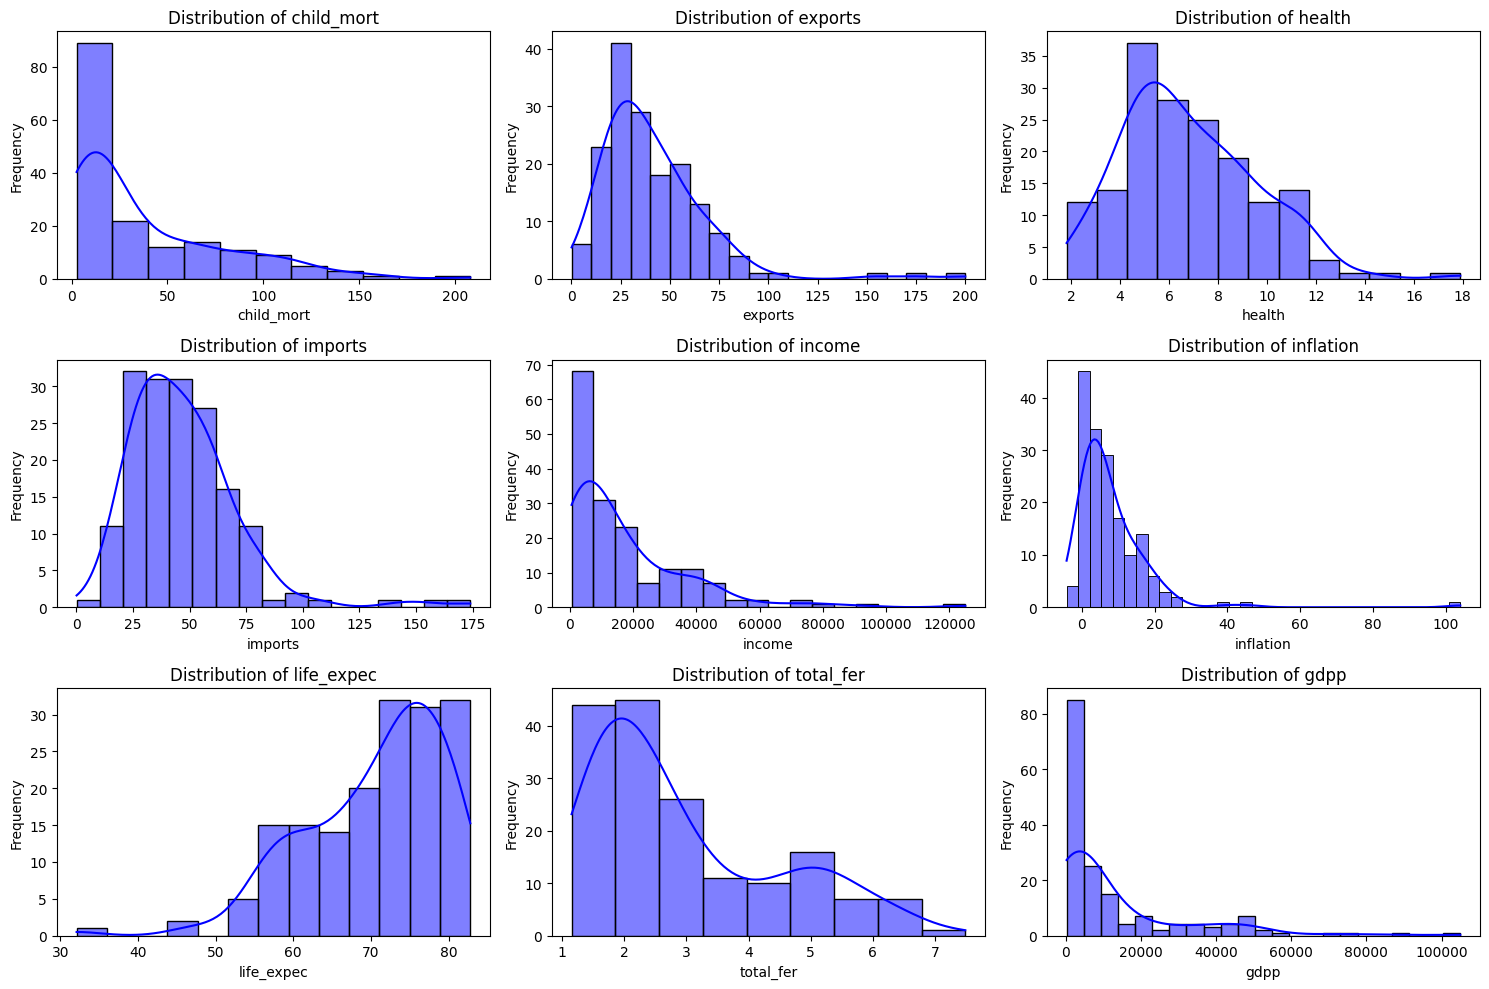

In [13]:
num_rows=3
num_cols=3

plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(num_rows,num_cols,i)
    sns.histplot(data[feature],kde=True,color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Observations
#### The data is skewed in most cases.
* **Child Mortality Rate Distribution:** The majority of countries have low rates of child mortality, but there is a long tail, meaning that some have very high rates. 
* **Income Distribution:** The distribution of income tends to be skewed to the right, meaning that most countries have relatively low income levels, while only a small number of countries possess very high income levels

 * **Inflation Rate Distribution:** The majority of countries experience inflation rates ranging from -5 to 20. However, there are some exceptional cases where inflation rates are exceptionally high.

* **Life Expectancy Distribution:** The life expectancy of the majority of countries falls within the range of 60 to 80 years, although there are some instances where this range is exceeded.

# Box Plots

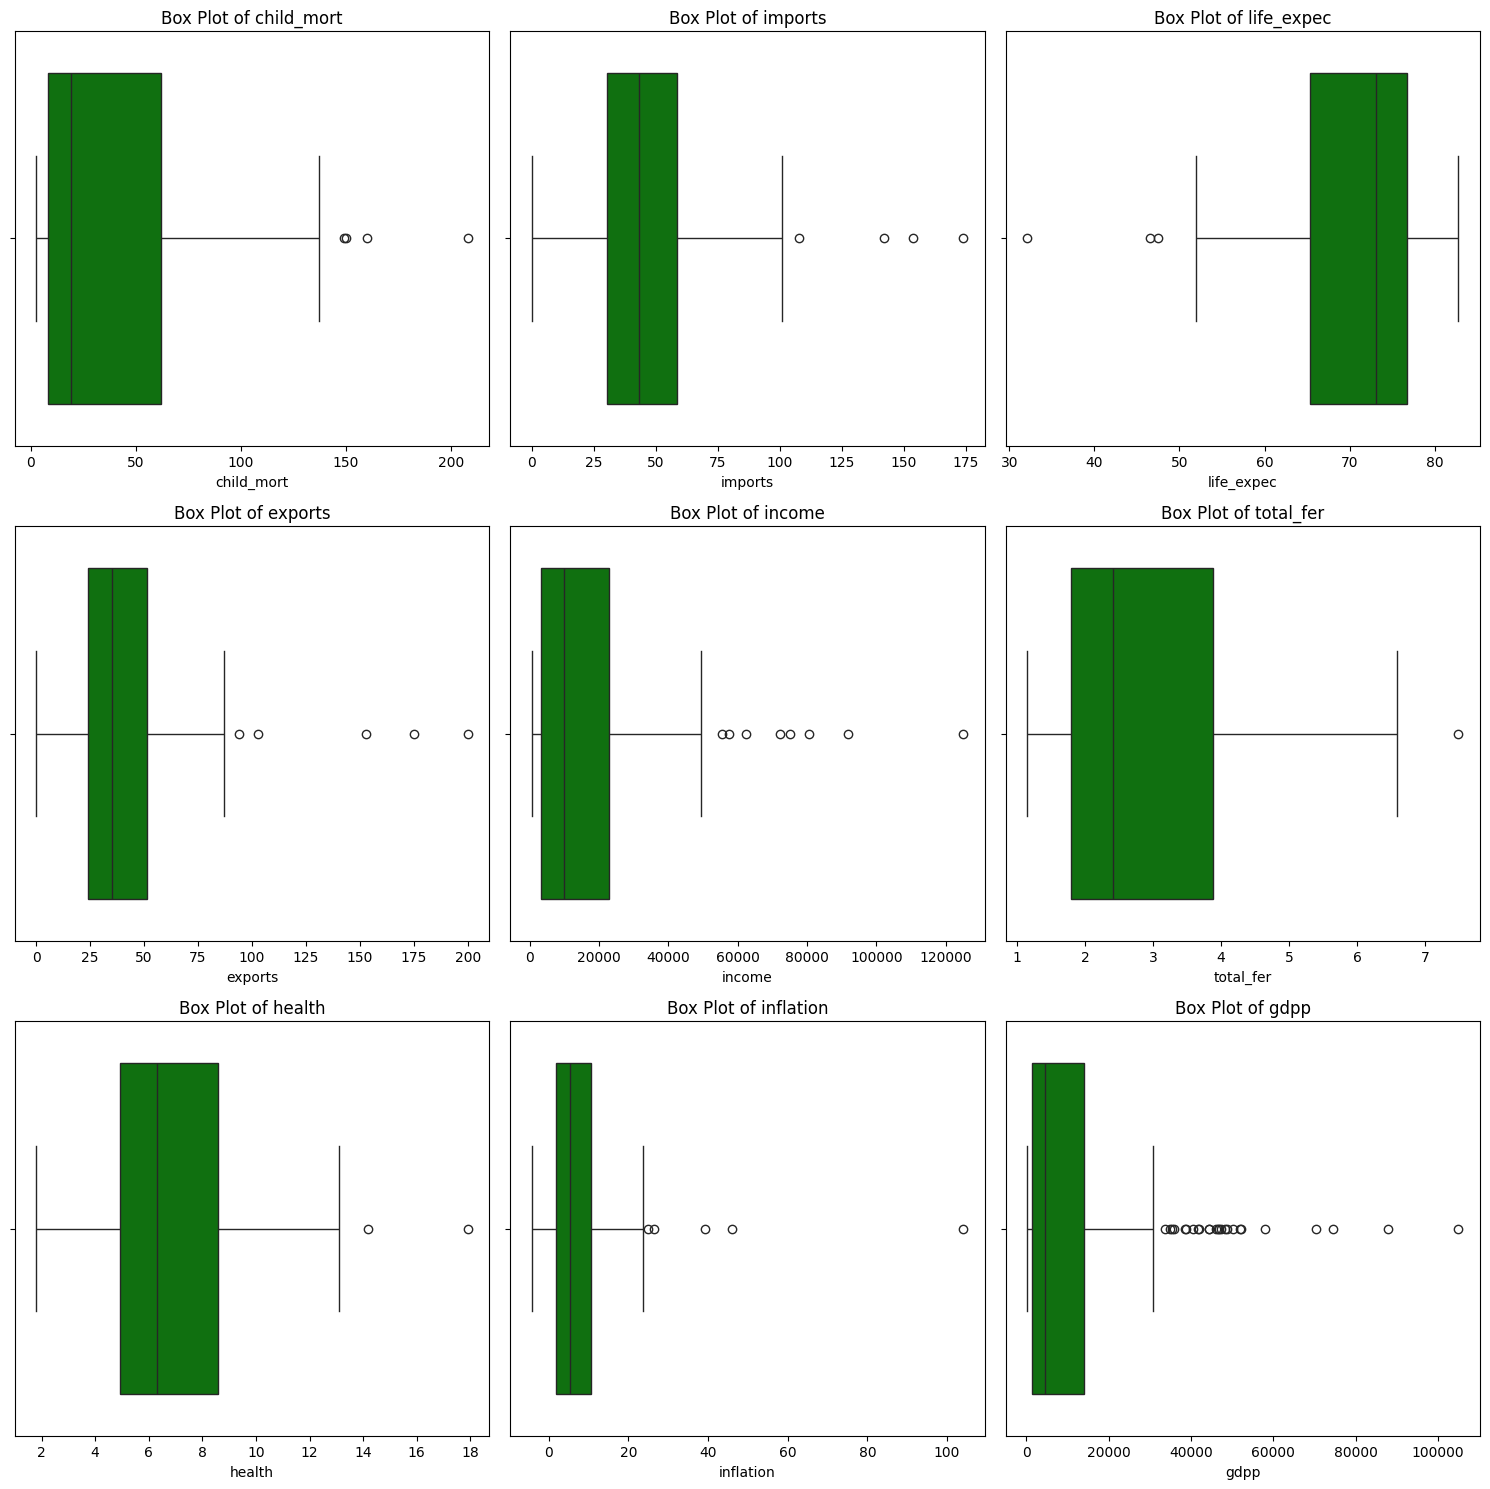

In [14]:
num_plots = len(numerical_features)
num_cols = 3  # Number of columns
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, feature in enumerate(numerical_features):
    row = i % num_rows  # Calculate row index
    col = i // num_rows  # Calculate column index
    sns.boxplot(x=data[feature], color='green', ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {feature}')
    axes[row, col].set_xlabel(feature)


plt.tight_layout()
plt.show()


# <b>Observations</b>

* We can observe from the data distribution and above diagram that some features do in fact have outliers.Outliers will not be eliminated for the purposes of this analysis because they may be highly instructive in identifying nations that are in dire need of assistance.

# Child Mortality

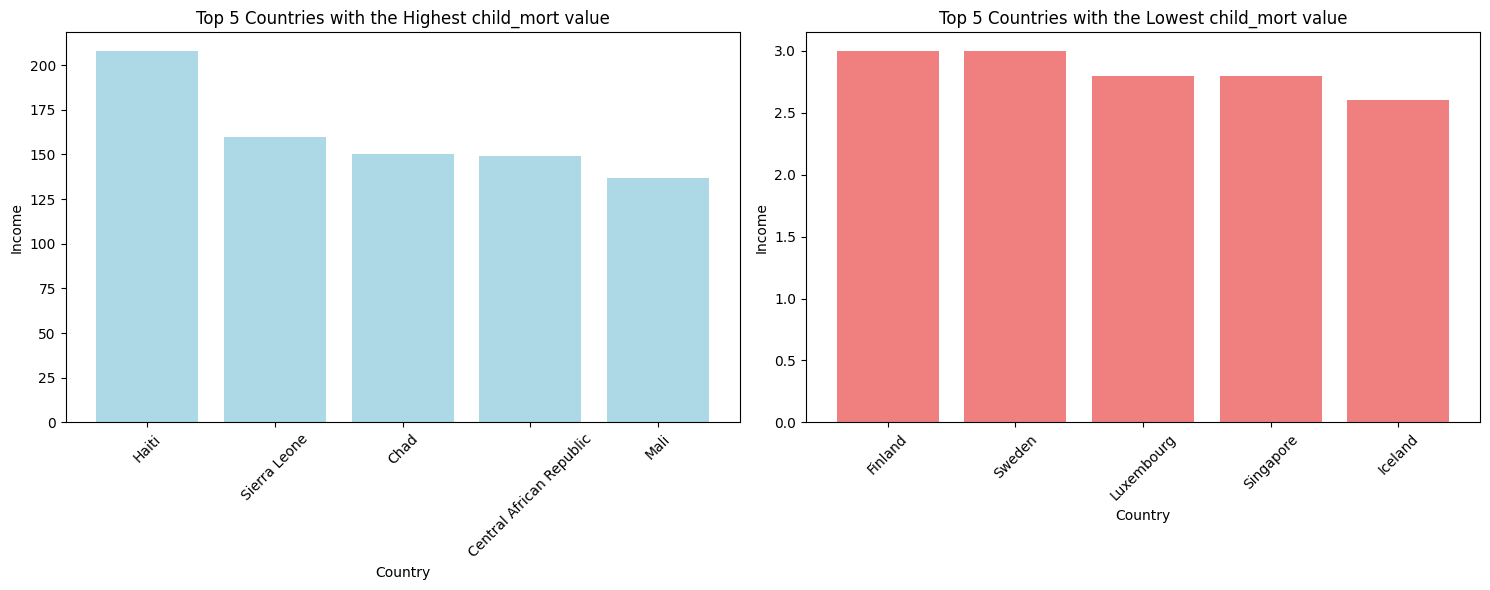

In [15]:
highest_child_mortality_countries = data.sort_values('child_mort', ascending=False).head(5)
lowest_child_mortality_countries = data.sort_values('child_mort',ascending=False).tail(5)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
#For the first plot
ax1.bar(highest_child_mortality_countries['country'], highest_child_mortality_countries['child_mort'], color='lightblue')
ax1.set_title('Top 5 Countries with the Highest child_mort value')
ax1.set_xlabel('Country')
ax1.set_ylabel('Income')
ax1.tick_params(axis='x', rotation=45)  

# For the second plot
ax2.bar(lowest_child_mortality_countries['country'], lowest_child_mortality_countries['child_mort'], color='lightcoral')
ax2.set_title('Top 5 Countries with the Lowest child_mort value')
ax2.set_xlabel('Country')
ax2.set_ylabel('Income')
ax2.tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

* The country with the highest rate of child mortality is Haiti, closely followed by Sierra Leone and Chad. A notable feature regarding child and infant mortality is the predominance of the highest rates in African countries worldwide.

* When it comes to the lowest rate of child mortality worldwide, Iceland tops the list. Singapore and Luxembourg then follow suit with the best infant mortality rates.

In [16]:

fig = px.choropleth(data,
                    locations='country',  # country names
                    locationmode='country names',  
                    color='child_mort',  # Column name
                    hover_name='country',  
                    color_continuous_scale='Blues',  
                    title='Countries by child_mort value',
                    range_color=[0, data['child_mort'].max()])

fig.show()


# Exports

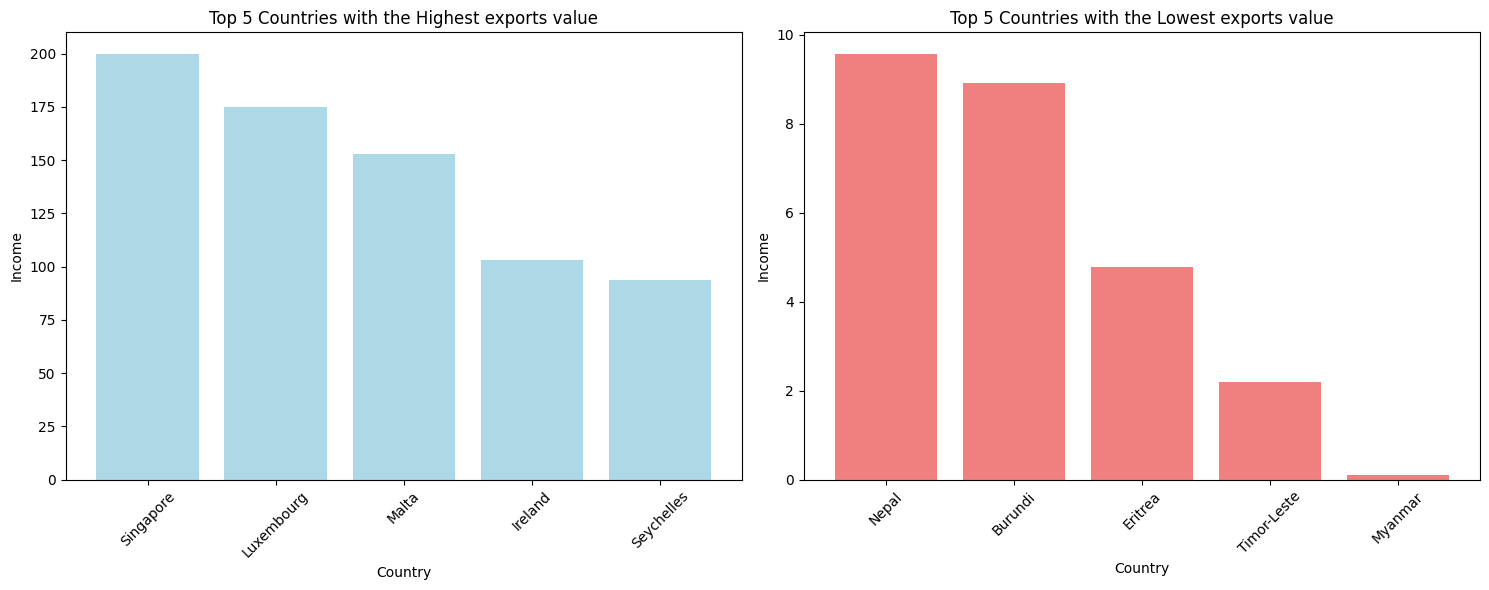

In [17]:
highest_exports_countries = data.sort_values('exports', ascending=False).head(5)
lowest_exports_countries = data.sort_values('exports',ascending=False).tail(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
#For the first plot
ax1.bar(highest_exports_countries['country'], highest_exports_countries['exports'], color='lightblue')
ax1.set_title('Top 5 Countries with the Highest exports value')
ax1.set_xlabel('Country')
ax1.set_ylabel('Income')
ax1.tick_params(axis='x', rotation=45)  

# For the second plot
ax2.bar(lowest_exports_countries['country'], lowest_exports_countries['exports'], color='lightcoral')
ax2.set_title('Top 5 Countries with the Lowest exports value')
ax2.set_xlabel('Country')
ax2.set_ylabel('Income')
ax2.tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()



* In terms of exports, Singapore is the leader, followed by Luxembourg and Malta. On the other hand, as was already said, Singapore and Luxembourg have the lowest rates of child mortality worldwide. It seems like there is a negative correlation between exports and child mortality.


* The country with the lowest export rate is Myanmar, an Asian country. After Myanmar, Timor-Leste and Eritrea, which are both African nations, similarly exhibit low levels of export activity. So far, in the two cases analyzed, African and Asian countries have shown the least positive results

In [18]:

fig = px.choropleth(data,
                    locations='country',  #country names
                    locationmode='country names',
                    color='exports',  # export values
                    hover_name='country',  
                    color_continuous_scale='YlGnBu',  
                    title='Countries by exports value', 
                    range_color=[0, data['exports'].max()])

fig.show()

In this phase, I noticed that I was duplicating code while displaying bar graphs, which contradicts the principle of DRY (Don't Repeat Yourself). Therefore, I made a decision to create a function to showcase these plots instead.

In [19]:
def plot_top_countries(data, column, num_top_countries, color_highest, color_lowest):
    """This function takes data(DataFrame itself), column names, the number of countires and colors for the low and high valuesas a argument 
    and it produces side-by-side vertical bar graphs"""

        
    highest_countries = data.nlargest(num_top_countries, column)#Extract the top countries for the given column where the value is the highest.
    
    lowest_countries = data.nsmallest(num_top_countries, column)#Extract the top countries for the given column where the value is the lowest.
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # for the first plot
    ax1.bar(highest_countries['country'], highest_countries[column], color=color_highest)
    ax1.set_title('Top {} Countries with the Highest {} value'.format(num_top_countries, column))#dynamic titles
    ax1.set_xlabel('Country')
    ax1.set_ylabel(column)
    ax1.tick_params(axis='x', rotation=45)  

    # for the second plot
    ax2.bar(lowest_countries['country'], lowest_countries[column], color=color_lowest)
    ax2.set_title('Top {} Countries with the Lowest {} value'.format(num_top_countries, column))
    ax2.set_xlabel('Country')
    ax2.set_ylabel(column)
    ax2.tick_params(axis='x', rotation=45)  

    plt.tight_layout()
    plt.show()


In [20]:
import plotly.express as px

def create_choropleth_map(data, column_name, color_scale):
    """
        This function takes data(DataFrame itself), column names and color  as a argument and it produces a choropleth map using Plotly, 
        returning a Figure object representing the map.
    """
    fig = px.choropleth(data,
                        locations='country',  # country names
                        locationmode='country names',  
                        color=column_name,  # Column values
                        hover_name='country',  
                        color_continuous_scale=color_scale,  
                        title=f'Countries by {column_name} value', #dynamic title
                        range_color=[0, data[column_name].max()])

    return fig


# Health

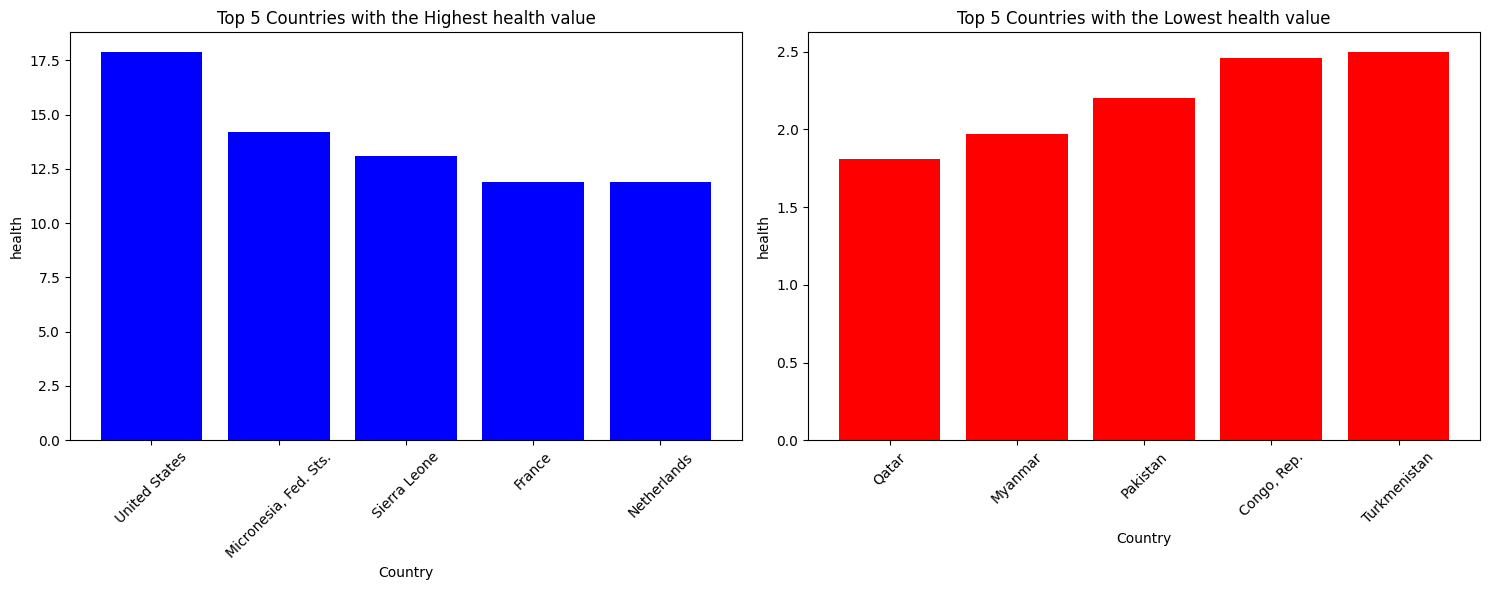

In [21]:
plot_top_countries(data, 'health', 5, 'blue', 'red')


* The United States is at the top of the health rankings. It's unexpected that Micronesia and Sierra Leone are next on the list.

* Across the globe, Qatar pays the least attention to health. Following that are Myanmar and Pakistan. It appears that Asian nations have done a bad job of addressing this problem.

In [22]:
choropleth_fig_health = create_choropleth_map(data, 'health', 'YlOrRd')
choropleth_fig_health.show()


# Imports

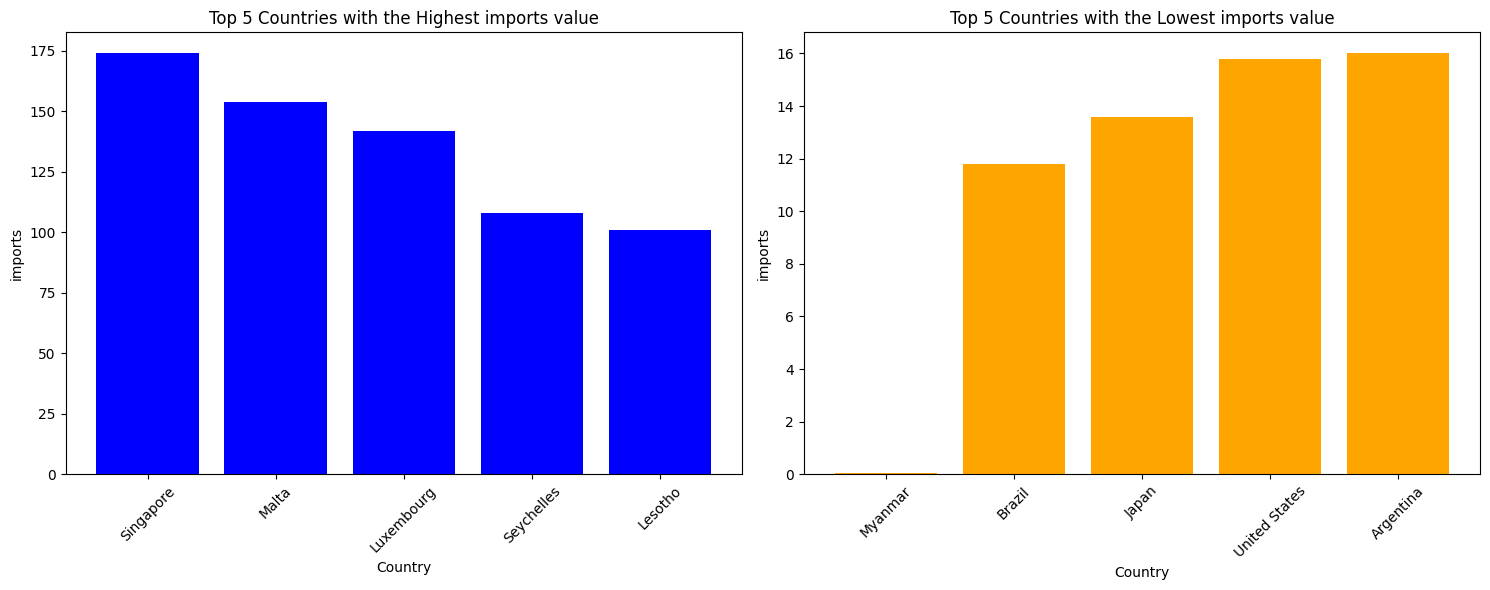

In [23]:
plot_top_countries(data, 'imports', 5, 'blue', 'orange')


* Singapore, particularly, stands out in Asia so this allows a distinctive emphasis on addressing health issues, unlike many other Asian countries. Unlike many other Asian nations, Singapore stands out in particular, allowing for a unique emphasis on tackling health issues.

* Myanmar, Brazil, and Japan had very few imports. Due to its economic difficulties, Myanmar does not appear to be able to purchase imports like more developed countries like Japan. I suppose that international organizations ought to assist Myanmar.

In [24]:
choropleth_fig_imports = create_choropleth_map(data, 'imports', 'Portland')
choropleth_fig_imports.show()

# Income

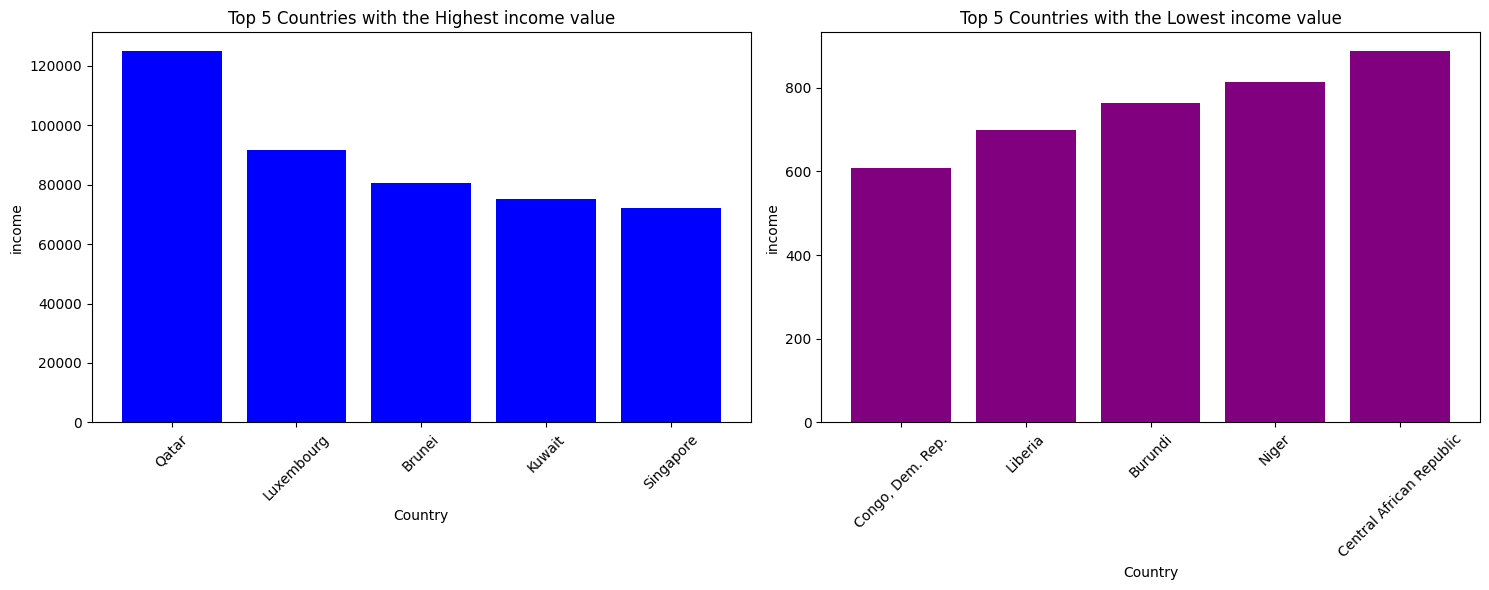

In [25]:
plot_top_countries(data,'income',5, 'blue','purple')

* When it comes to income, Qatar is far ahead of the next-place nation. Singapore and Luxembourg also distinguish themselves, with Luxembourg earning recognition in the top three.

* With Congo, Liberia, and Burundi ranked first, second, and third, respectively, African nations have the lowest income levels in the world.

In [26]:
choropleth_fig_income = create_choropleth_map(data, 'income', 'Spectral')
choropleth_fig_income.show()

# Inflation

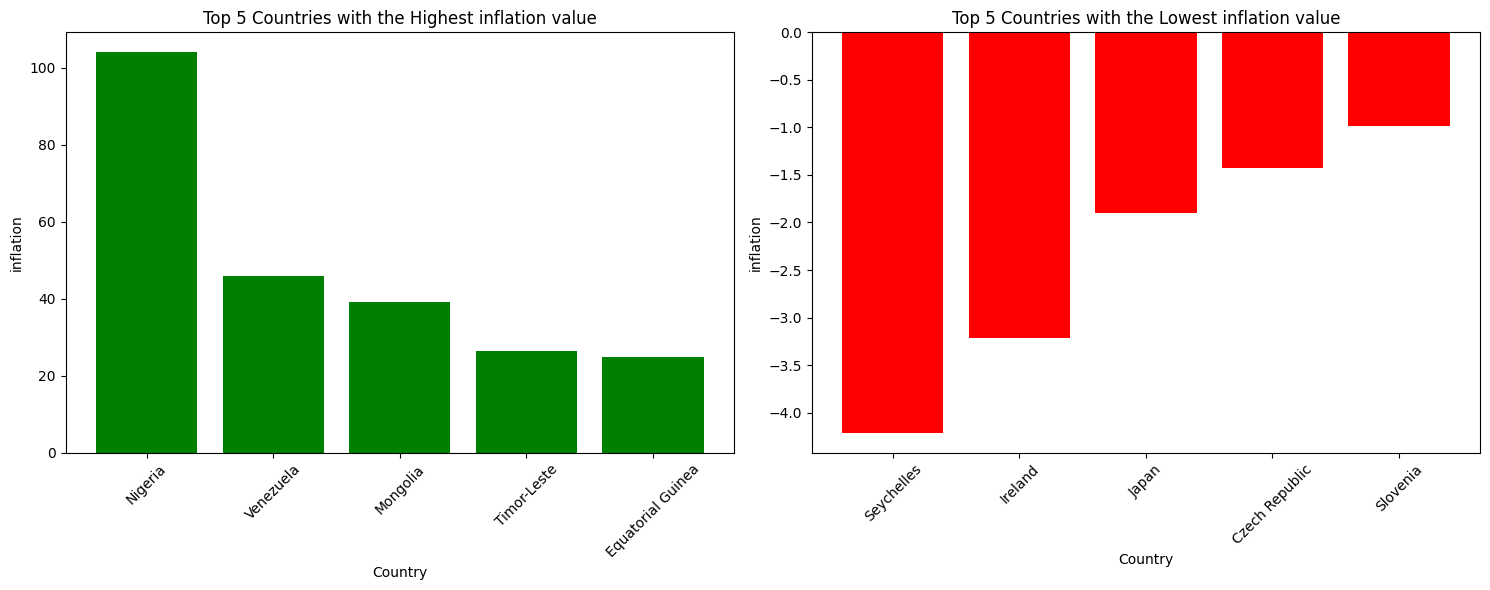

In [27]:
plot_top_countries(data,'inflation',5, 'green','red')

* The countries with the greatest rates of inflation include Nigeria,Venezuela and Mongolia
The difficulties that African countries face are once again apparent.

* Seychelles, Ireland,Japan have the best economic conditions, as seen by their lowest rates of inflation. Remarkably, two nations that had routinely placed in the top three—Singapore and Luxembourg—did not place this time.

In [28]:
choropleth_fig_inflation = create_choropleth_map(data, 'inflation', 'Bluered')
choropleth_fig_inflation.show()

# Life Expectancy

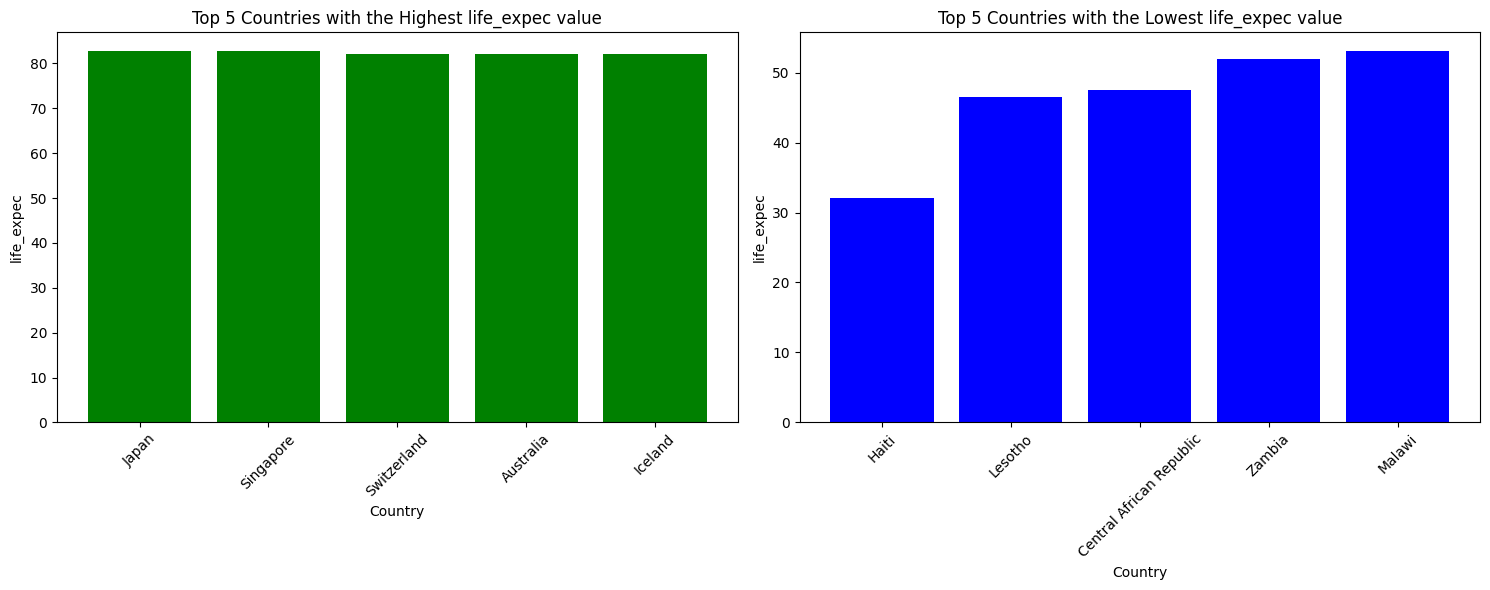

In [29]:
plot_top_countries(data,'life_expec',5, 'green','blue')

* Japan routinely ranks highly across multiple categories. Furthermore, Singapore is once again among the top 3 countries in the world for Life Expectancy. Moreover, Singapore  and Switzerland hold positions two and three in the rankings, respectively.


* Haiti, Lesotho, and The Central African Republic have the lowest scores in this category; as I mentioned before, child mortality is higher in Haiti. Once again, African countries do worse than average in this aspect.

In [30]:
choropleth_fig_life_expec = create_choropleth_map(data, 'life_expec', 'Greens')
choropleth_fig_life_expec.show()

# Fertility

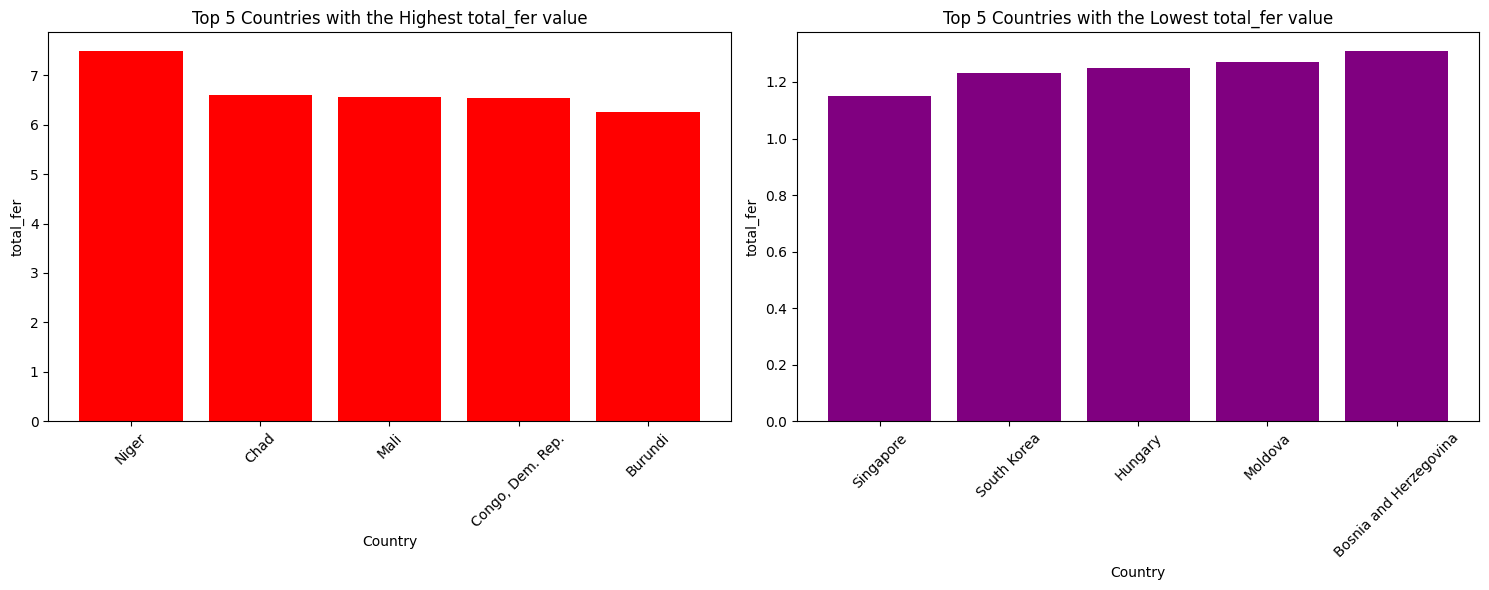

In [31]:
plot_top_countries(data,'total_fer',5, 'red','purple')

* The innate capacity to become pregnant and give birth to a child is known as fertility.Children born to women with fewer children typically have a higher chance of surviving and being healthy. People often live longer in nations like Singapore, where women have fewer children. However, a large number of babies are born in African nations like Mali, Niger, and Chad. 


* Meanwhile, Singapore,South Korea and Hungary have the lowest fertility rates.

In [32]:
choropleth_fig_total_fer = create_choropleth_map(data, 'total_fer', 'Bluered')
choropleth_fig_total_fer.show()

# GDPP

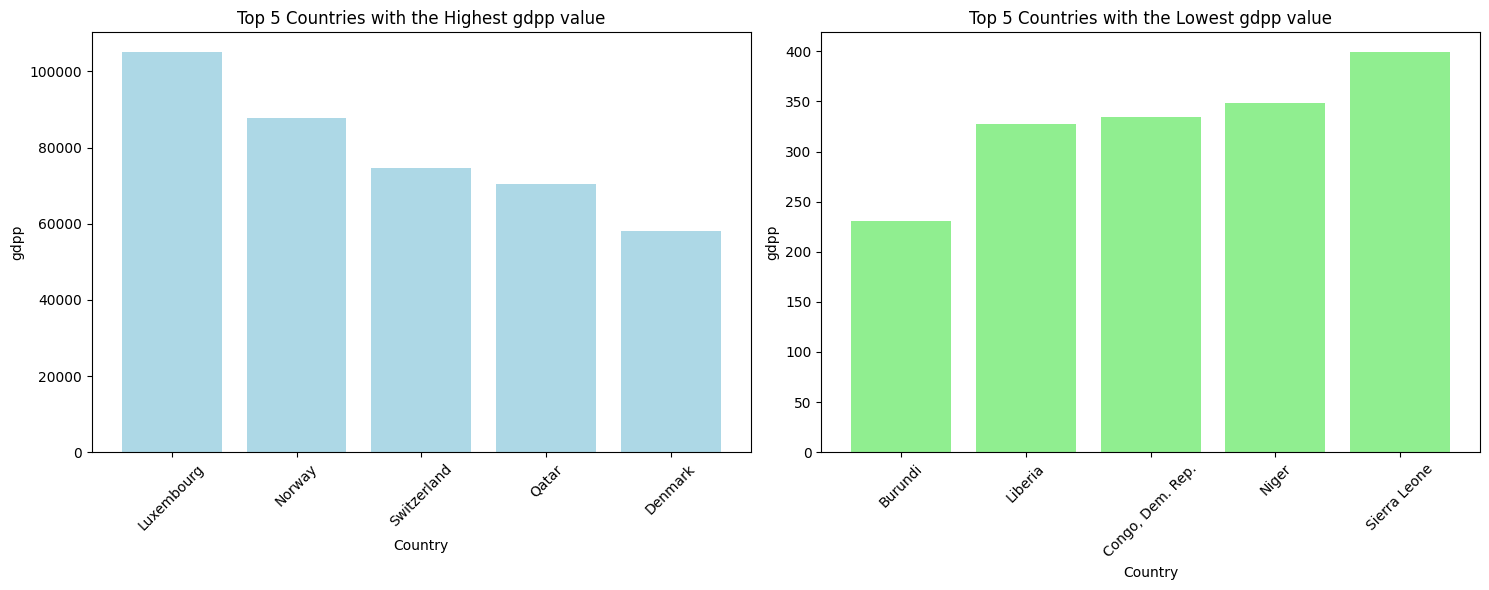

In [33]:
plot_top_countries(data,'gdpp',5, 'lightblue','lightgreen')

* The Gross Domestic Product per capita (GDPP) is largely dependent on the size of the population. Luxembourg's high export volume helps it rank as the top country in GDPP. Therefore, among the best in this regard are also Norway and Switzerland.

*  African countries still encountered major difficulties. At the same time, Burundi, Liberia, and Congo showed the weakest results.

In [34]:
choropleth_fig_gdpp = create_choropleth_map(data, 'gdpp', 'RdYlGn')
choropleth_fig_gdpp.show()

# <b>Observations</b>

#### As the bar plots showed, together with the above maps, we can conclude as follows:

* **General Wealthy Countries:** Countries in North America and Europe appear to have high values on the economic indicators being visualized. This suggests that these regions are generally wealthier compared to others.

* **Africa Shows the Worst Values:** The data indicates that African countries generally have lower values on the economic indicators. This could suggest lower levels of wealth or economic development in African countries compared to others.

* **Asia Seems Well Calibrated with Usual Values:** Asia appears to have values that are neither extremely high nor extremely low compared to other regions. This suggests that Asian countries have a moderate level of economic development, neither as high as North America and Europe nor as low as Africa.

# Correlations

In [35]:
data2 = data.set_index('country')
data2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


## Correlation matrix

In [36]:
data2.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


# Heatmap

<Axes: >

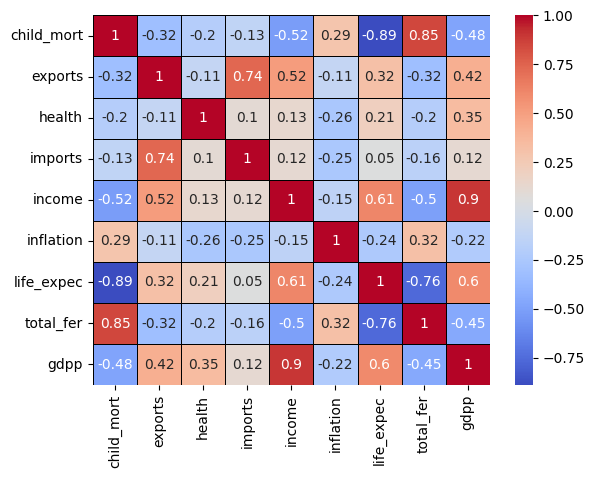

In [37]:
sns.heatmap(
    data2.corr().round(2), annot=True,
    linecolor='black', linewidths=.5,
    cmap='coolwarm'
)

# <b>Observations</b>


* child_mort has high correlation with total_fer(0.85%). Conversely, child mortality exhibits negative correlations with exports, health, imports, income, life expectancy, and GDP per capita. This indicates that as child mortality rises, GDP per capita, income, imports, and exports tend to decrease.

* exports has a good correlation with imports (0.74%), income(0.52%). On the other hand, it has a negative correlation with health, inflation, and total_fer.Furthermore, when exports increase, gdpp, income and imports also increase.

* income has a (0.61%) correlation with life_expec and it has a high correlation with gdpp(%0.9). On the other hand, it has a negative correlation with child mort(0.52%), total_fer (0.50%). It means that when income increases, life expectancy and gdpp also increase,whereas child_mort and total_fer tend to decrease.

* life_expec has (0.61%) corrlation with gdpp and also it has (0.6%) correlation with incoome.At the same time it has strong negative correlation (-0.89%) with child_mort rate and (-0.76%) with total_fer

* High inflation displays a positive correlation with total_fer (0.32%) and child_mort(0.29%).



# <b>Preprocessing</b>

 I am performing feature scaling on the data because I intend to use both KMeans and hierarchical agglomerative clustering (HAC) algorithms. Both of these algorithms are sensitive to the scale of features, particularly when using distance-based similarity measures such as Euclidean distance. By scaling the features, I ensure that all features contribute equally to the clustering process.

# Scaling

In [38]:
data2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [39]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

standardized_data = scaler.fit_transform(data2)
standardized_data


array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 9))

In [40]:
standardized_df2 = pd.DataFrame(standardized_data,index=data2.index,columns=data2.columns)
standardized_df2.round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.29,-1.14,0.28,-0.08,-0.81,0.16,-1.62,1.90,-0.68
Albania,-0.54,-0.48,-0.10,0.07,-0.38,-0.31,0.65,-0.86,-0.49
Algeria,-0.27,-0.10,-0.97,-0.64,-0.22,0.79,0.67,-0.04,-0.47
Angola,2.01,0.78,-1.45,-0.17,-0.59,1.39,-1.18,2.13,-0.52
Antigua and Barbuda,-0.70,0.16,-0.29,0.50,0.10,-0.60,0.70,-0.54,-0.04
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.23,0.20,-0.57,0.24,-0.74,-0.49,-0.85,0.37,-0.55
Venezuela,-0.53,-0.46,-0.70,-1.21,-0.03,3.62,0.55,-0.32,0.03
Vietnam,-0.37,1.13,0.01,1.38,-0.66,0.41,0.29,-0.66,-0.64


# <b>TASK 6 – Clustering</b>


# Elbow Method

In [41]:
from sklearn.cluster import KMeans

In [42]:
k_values = range(1,11)#here i define range for k values
k_values


range(1, 11)

In [43]:
inertia_values = [] #empty list in order to store inertia values
for k in k_values:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=1)
    kmeans.fit(standardized_df2) #Fitting the model to the standardized data and calculating inertia
    inertia_values.append(kmeans.inertia_)

In [44]:
inertia_values

[1503.0000000000002,
 1050.2145582853304,
 831.5351582151586,
 784.8999887752875,
 733.9883845860611,
 678.9820397102728,
 560.310716539122,
 507.9177339866313,
 453.70050707412776,
 432.61748010248596]

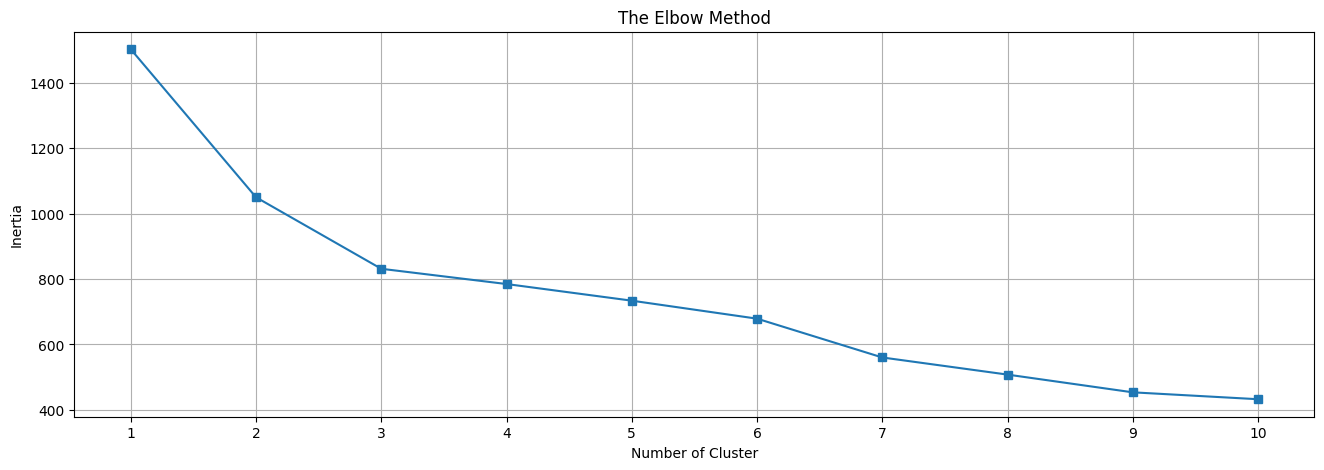

In [45]:
fig, ax = plt.subplots(figsize=(16,5)) #plotting intertia values against the number of clusters
ax.plot(range(1,11), inertia_values, marker='s')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

* From the above plot, we can select a 𝑘 value of 3 or 4. However, it is not entirely clear which is optimal, which is why I also checked the silhouette method.

# Silhouette Score Method


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [47]:
silhouette_scores = []# empty list for storing silhouette scores for each k
k_values = range(2,11)

In [48]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1, n_init=30)
    cluster_labels = kmeans.fit_predict(standardized_df2) #Fitting the model to the standardized data 
    silhouette_scores.append(silhouette_score(standardized_df2, cluster_labels))

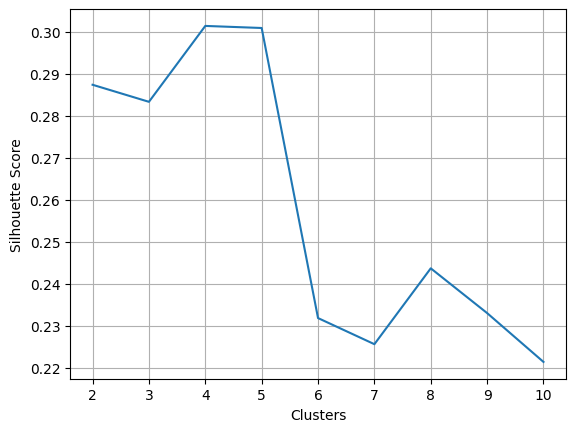

In [49]:
plt.plot(range(2, max(k_values) + 1), silhouette_scores)# plotting silhouette scores against the number of clusters
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



* Based on the above plots and the results from both methods, the optimal 𝑘 value to select is 4.

# K-means Algoritm

In [50]:
random_state = 170

kmeans_pp = KMeans(
    n_clusters=4, 
    random_state=random_state, 
    n_init=20, 
    init='k-means++', 
    max_iter=300, tol=0.0001) 

X_array = standardized_df2.values

cluster_assignments=kmeans_pp.fit_predict(X_array)

def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

k_means_report(kmeans_pp)

kmeans_pp.cluster_centers_

cluster_assignments

k-means 
 * has seen 9 features,
 * used 5 iterations, and 
 * resulted in an inertia of 700.4769742197275.


array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)


I want to include cluster labels in the DataFrame in order to show which countries are grouped together. 

In [51]:
standardized_df2_cluster_kmeans=standardized_df2.copy().reset_index()


In [52]:
standardized_df2_cluster_kmeans['cluster'] =  cluster_assignments


In [53]:
standardized_df2_cluster_kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


In [54]:
standardized_df2_cluster_kmeans.cluster.value_counts()

cluster
1    87
0    46
2    31
3     3
Name: count, dtype: int64

# <b>Observations</b>

Comparing Cluster 1 to the other three clusters, Cluster 1 has the most data points. Compared to the other three clusters, Cluster 3 contains significantly less data points than the others.

# k-Means Clustering Interpretation

In [55]:
standardized_df2_cluster_kmeans.set_index('country',inplace=True)

In [56]:
standardized_df2_cluster_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1


Now,I would like to see the average values of features within each cluster in order to compare results

In [57]:
cluster_means_kmeans2 = standardized_df2_cluster_kmeans.groupby('cluster').mean()
cluster_means_kmeans2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,1.382094,-0.449026,-0.171157,-0.197289,-0.697478,0.408505,-1.277062,1.395595,-0.609510
1,-0.405791,-0.002772,-0.209961,0.042057,-0.226245,-0.023665,0.241974,-0.427789,-0.339265
2,-0.829856,0.196432,0.844011,-0.265416,1.433827,-0.490959,1.097183,-0.769780,1.620359
3,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797


Here, I noticed that some values in the data are negative. To avoid this, I'm using MinMaxScaler to ensure that all values are positive and fall within a specific range.

In [58]:
scaler_cluster_kmeans = MinMaxScaler(feature_range=(1, 10))
cluster_means_kmeans_sc2 = scaler_cluster_kmeans.fit_transform(cluster_means_kmeans2)

cluster_means_kmeans_sc2 = pd.DataFrame(cluster_means_kmeans_sc2, 
                                        index=cluster_means_kmeans2.index, 
                                        columns=cluster_means_kmeans2.columns) #converting to dataframe




cluster_means_kmeans_sc2


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,10.00000,1.00000,1.331347,1.127381,1.000000,10.000000,1.000000,10.000000,1.000000
1,2.78787,1.74587,1.000000,1.574899,2.351952,5.738488,6.460041,3.259092,1.797362
2,1.07724,2.07882,10.000000,1.000000,7.114639,1.130628,9.534017,1.994778,7.579280
3,1.00000,10.00000,2.723178,10.000000,10.000000,1.000000,10.000000,1.000000,10.000000


Now, it's straightforward to make comparisons between clusters using the feature values. However, I consider it will be simpler if I use a bar graph to display the feature values for each cluster.


<Axes: xlabel='cluster'>

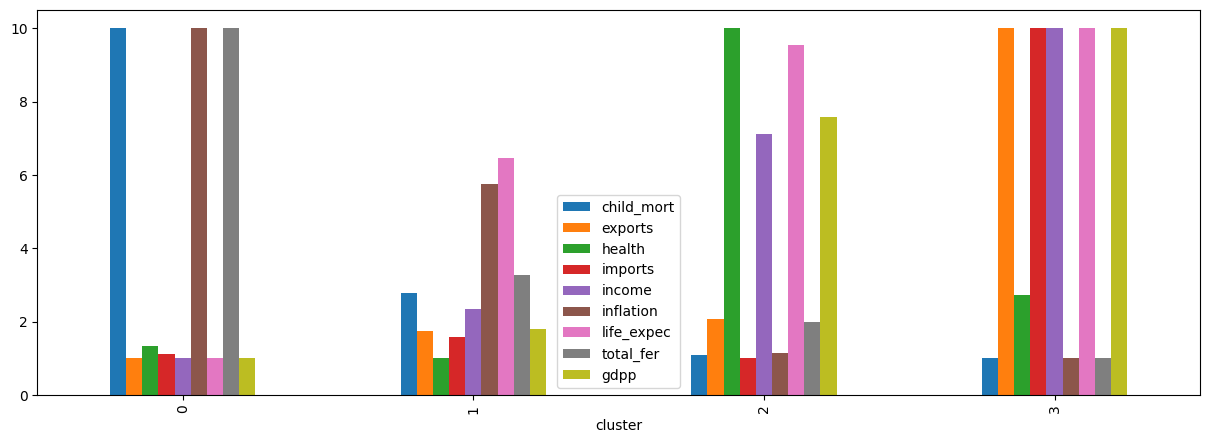

In [59]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
cluster_means_kmeans_sc2.plot(kind='bar',figsize = (15,5),  color=colors)

# <b>Observations</b>

* After running the k-Means clustering, I found 4 distinct groups. Looking at the data and the graph, Cluster 0 stands out with the highest child mortality and inflation rates, along with the lowest GDP. Its health situation is also quite poor compared to the other clusters. This cluster represents the poorest and least developed countries, needing urgent attention and support.




* The highest levels of GDP, income, life expectancy, exports, and imports are found in Cluster 3.It has the second highest health ranking among the clusters .Recall from task 4 that Sierra Leone, an African country, has the third-best health level, indicating that health alone doesn't determine a country's development. Therefore, we can consider the countries in Cluster 3 to be the richest or most developed.

* Countries in Cluster 2 are less developed or wealthy than those in Cluster 3 but more developed or wealthy than those in Cluster 1.

As a consequence, I can categorize the group of countries according to the clusters as

* <b>Cluster 0-</b>the most undeveloped
* <b>Cluster 1-</b>developing
* <b>Cluster 2-</b>developed
* <b>Cluster 3-</b>the most developed

It means we have to focus on countries that are grouped in Cluster 0

In [60]:
standardized_df2_cluster_kmeans.reset_index(inplace=True)

In [61]:
# For Cluster 0:
poorest_countries_kmeans = standardized_df2_cluster_kmeans[standardized_df2_cluster_kmeans.cluster == 0].sort_values(by =
                       ['child_mort','income', 'gdpp'], ascending = [False, True, True])
print('Top 10 countries those in need of help the most: ')
poorest_countries_kmeans[['country']].head(10)

Top 10 countries those in need of help the most: 


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


# <b>HAC Clustering Method</b>

In [62]:
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [63]:
agg = cluster.AgglomerativeClustering(
    n_clusters=4, 
    metric='euclidean', 
    linkage='complete', 
    compute_distances=True)
labels = agg.fit_predict(standardized_df2) # Fitting the model and getting cluster labels for each sample


In [64]:
def create_linkage(agg):
    """Defining a function in order to create a linkage matrix for dendrogram plotting."""
    n_samples = len(agg.labels_)
    counts = np.zeros(agg.children_.shape[0])
    for i, merge in enumerate(agg.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([agg.children_, agg.distances_,counts]).astype(float)
    return linkage_matrix

matrix=create_linkage(agg) #creation of linkage matrix

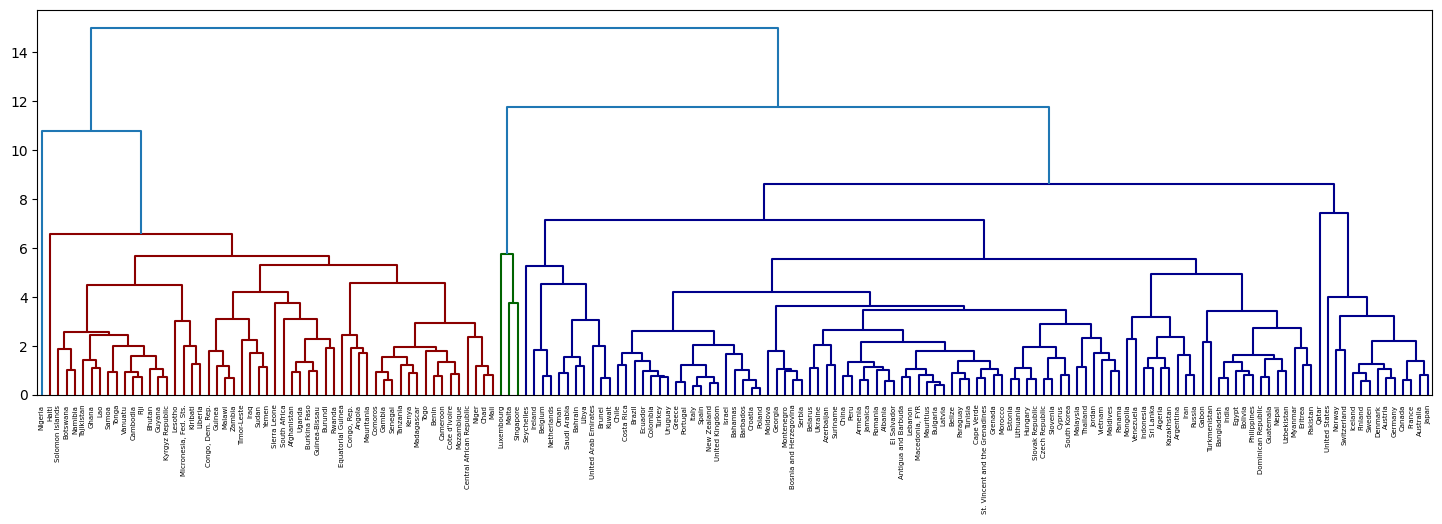

In [65]:
hierarchy.set_link_color_palette(['darkred', 'darkgreen', 'darkblue', 'indigo'])#plotting the dendogram
plt.figure(figsize=(18,5))
dendrogram(
    matrix,
    color_threshold=10, 
    orientation='top', 
    labels=standardized_df2.index, 
    leaf_rotation=90)
plt.show();

* I created a dendrogram to display the cluster hierarchy and the distances at which they combine. To compare hierarchical clustering to k-means results and make an informed selection between the two methods, I selected a dendrogram threshold of 10 to produce a similar number of clusters (4 in this example).

Now, I want to include cluster labels in the DataFrame in order to show which countries are grouped together. 

In [66]:
standardized_df2_cluster_hac = standardized_df2.copy().reset_index()


In [67]:
standardized_df2_cluster_hac['cluster']=labels


In [68]:
standardized_df2_cluster_hac

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [69]:
standardized_df2_cluster_hac.cluster.value_counts()

cluster
0    109
1     54
2      3
3      1
Name: count, dtype: int64

* We can observe that some clusters are not good because Cluster 2 has only 3 data points and Cluster 3 only has 1. 


# HAC Clustering Interpretation

In [70]:
standardized_df2_cluster_hac

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [71]:
standardized_df2_cluster_hac.set_index('country', inplace=True)

In [72]:
standardized_df2_cluster_hac

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0


Now,I would like to see the average values of features within each cluster in order to compare results

In [73]:
cluster_means_hac2 = standardized_df2_cluster_hac.groupby('cluster').mean()
cluster_means_hac2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,-0.528293,0.043270,0.034203,-0.159551,0.282872,-0.123684,0.535393,-0.563099,0.237844
1,1.071289,-0.350834,-0.056782,0.092012,-0.694955,0.108602,-1.127855,1.158857,-0.604916
2,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797
3,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936


Also here, I observe that some values in the data are negative. To avoid this, I'm using MinMaxScaler to ensure that all values are positive and fall within a specific range.

In [74]:
standardized_df2_cluster_hac.reset_index(inplace=True)

In [75]:
standardized_df2_cluster_hac

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [76]:
scaler_cluster_hac = MinMaxScaler(feature_range=(1, 10)) 
cluster_means_hac_sc = scaler_cluster_hac.fit_transform(cluster_means_hac2)
cluster_means_hac_sc = pd.DataFrame(cluster_means_hac_sc, 
                                    index=cluster_means_hac2.index, 
                                    columns=cluster_means_hac2.columns)

cluster_means_hac_sc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,1.922055,2.014757,10.000000,2.656909,3.807609,1.355483,7.364241,2.449027,3.490333
1,6.520922,1.371511,8.780795,3.049306,1.000000,1.572485,1.023885,7.693572,1.000000
2,1.000000,10.000000,9.432291,10.000000,10.000000,1.000000,10.000000,1.000000,10.000000
3,10.000000,1.000000,1.000000,1.000000,1.203546,10.000000,1.000000,10.000000,1.067905


Also, here I am utilizing bar graph in order to display the feature values for each cluster

<Axes: xlabel='cluster'>

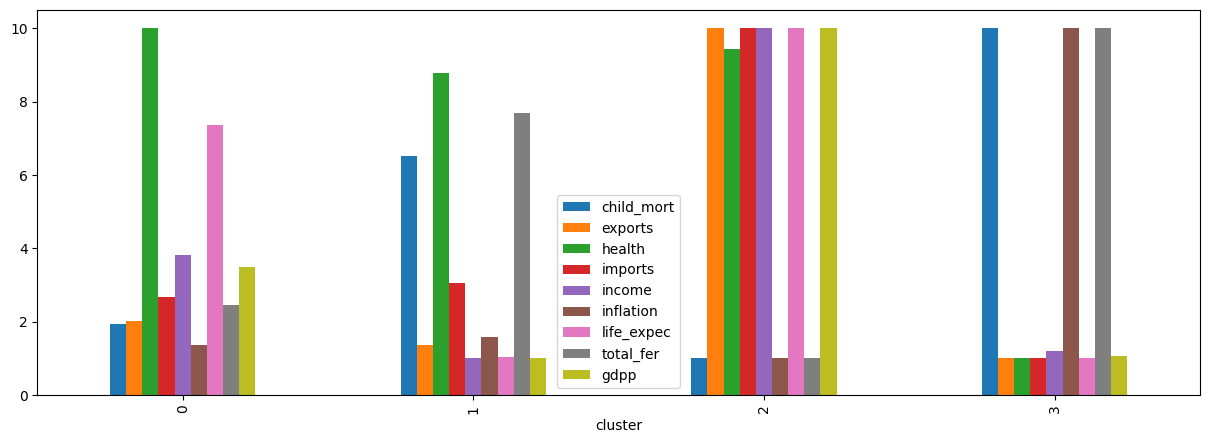

In [77]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
cluster_means_hac_sc.plot(kind='bar',figsize = (15,5),  color=colors)


# <b>Observations</b>

* By uing the HAC method,I found 4 clusters using the HAC method, just like with k-Means. Looking at both the data and the plot, Cluster 3 stands out with the highest child mortality, inflation, and total fertility rates. It also performs poorly in other features. This cluster might represent countries needing the most attention. However, since there's only 1 data point in this cluster, it doesn't serve the purpose outlined in task 1.

* Another cluster that may represent countries needing the most attention is Cluster 1. To confirm, I checked the countries in this cluster below. The results were similar to those from the k-Means method, with only 2 countries being different.
* Clusters 2 and 3 from HAC Clustering had extremely few data points, thus I couldn't categorize them as successfully as I could with k-Means Clustering.

* Cluster 2 will not be discussed individually because it only has two data points, which are insufficient for my analysis. However, Cluster 2's countries are often the most developed and wealthy.

* Cluster 0 represents developed countries, especially if we exclude Cluster 2


In [78]:
standardized_df2_cluster_hac[standardized_df2_cluster_hac.cluster==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
17,Benin,1.808842,-0.633337,-0.991634,-0.401467,-0.797319,-0.654410,-0.987502,1.598107,-0.667961,1
18,Bhutan,0.110176,0.050898,-0.589969,0.986444,-0.557989,-0.170019,0.174174,-0.376308,-0.590145,1
21,Botswana,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949,1
25,Burkina Faso,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,1
26,Burundi,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801,1
27,Cambodia,0.152456,0.475343,-0.414697,0.522426,-0.760900,-0.442341,-0.502530,-0.045030,-0.666429,1
28,Cameroon,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754,1
31,Central African Republic,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,1


In [79]:
poorest_countries__hac2 = standardized_df2_cluster_hac[standardized_df2_cluster_hac.cluster==1].sort_values(by =
                       ['child_mort','income', 'gdpp'], ascending = [False, True, True])
print('Top 10 countries those in need of help the most: ')
poorest_countries__hac2[['country']].head(10)



Top 10 countries those in need of help the most: 


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso
64,Guinea-Bissau


# <b>Selecting 1 Clustering Method:</b>

As a result of this task, I choose k-Means over HAC because the clusters formed with k-Means are superior to those formed with HAC.

# Task 7 – PCA(Dimensionality Reduction)


I have a dataset with many dimensions, and I plan to use PCA to simplify and speed up the analysis process. By applying PCA, I aim to reduce the number of variables while retaining nearly 90% of the dataset's information, making it easier to explore and visualize the data.

In [80]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

PCA is sensitive to differences in the scales of the original variables. If some variables have larger ranges than others, they'll exert more influence. It's crucial to center and scale the data before applying PCA. Therefore, I performed scaling during the preprocessing phase to ensure that variables with different scales have a similar impact on the analysis

In [81]:
pca = PCA()
pca_transformed = pca.fit_transform(standardized_df2)
standardized_df2_pca = pd.DataFrame(pca_transformed,index=data2.index)
standardized_df2_pca.round(2)

,0,1,2,3,4,5,6,7,8
country,,,,,,,,,
Afghanistan,-2.91,0.10,-0.72,1.01,-0.16,0.25,-0.38,-0.42,0.01
Albania,0.43,-0.59,-0.33,-1.16,0.17,-0.08,-0.25,0.22,-0.17
Algeria,-0.29,-0.46,1.22,-0.87,0.16,0.40,0.09,0.18,-0.08
Angola,-2.93,1.70,1.53,0.84,-0.27,0.55,0.44,0.36,0.09
Antigua and Barbuda,1.03,0.14,-0.23,-0.85,-0.19,0.21,-0.24,0.02,-0.09
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.82,0.64,-0.39,-0.71,-0.40,-0.01,0.10,-0.52,0.50
Venezuela,-0.55,-1.23,3.10,-0.12,2.08,-0.10,-0.21,0.08,0.28
Vietnam,0.50,1.39,-0.24,-1.07,1.18,-0.05,0.14,0.22,0.04


* When I examined the 9-dimensional dataset, I noticed that there were correlations between all features, as indicated by non-zero covariances.These correlations imply the presence of a smaller inherent dimensionality, likely less than nine. This suggests that techniques for reducing dimensionality could be beneficial for this dataset.

In [82]:
standardized_df2_pca.cov().round(2)

,0,1,2,3,4,5,6,7,8
0,4.16,-0.00,-0.00,-0.0,-0.00,-0.00,0.00,0.00,0.00
1,-0.00,1.56,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,0.00
2,-0.00,-0.00,1.18,0.0,0.00,-0.00,0.00,0.00,0.00
3,-0.00,-0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00
4,-0.00,-0.00,0.00,0.0,0.66,-0.00,-0.00,-0.00,0.00
5,-0.00,-0.00,-0.00,0.0,-0.00,0.22,-0.00,-0.00,-0.00
6,0.00,-0.00,0.00,0.0,-0.00,-0.00,0.11,-0.00,0.00
7,0.00,-0.00,0.00,0.0,-0.00,-0.00,-0.00,0.09,-0.00
8,0.00,0.00,0.00,0.0,0.00,-0.00,0.00,-0.00,0.07


After performing PCA, we don't find any connections between the different PCA components. Also, these components are arranged based on how much they change, with the most variable ones listed first

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


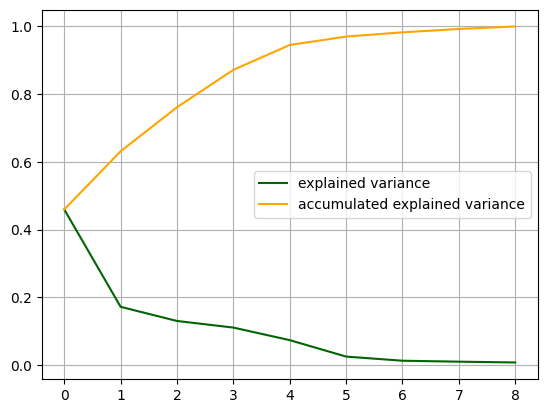

In [83]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
plt.plot(explained_variance, label='explained variance', color='darkgreen')  # Change color to blue
plt.plot(np.add.accumulate(explained_variance), label='accumulated explained variance', color='orange')  # Change color to orange
plt.legend()
plt.grid(True)
plt.show()


The top 4 principal components capture nearly 90% of the variability. Hence, I choose to utilize these four principal components

In [84]:
components = standardized_df2_pca.iloc[:,0:4] # 4 components
components

,0,1,2,3
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
Vanuatu,-0.820631,0.639570,-0.389923,-0.706595
Venezuela,-0.551036,-1.233886,3.101350,-0.115311
Vietnam,0.498524,1.390744,-0.238526,-1.074098


# Task 8 – Cluster Interpretation


In [85]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from warnings import filterwarnings
filterwarnings('ignore')

8.1 Silhoutte Score

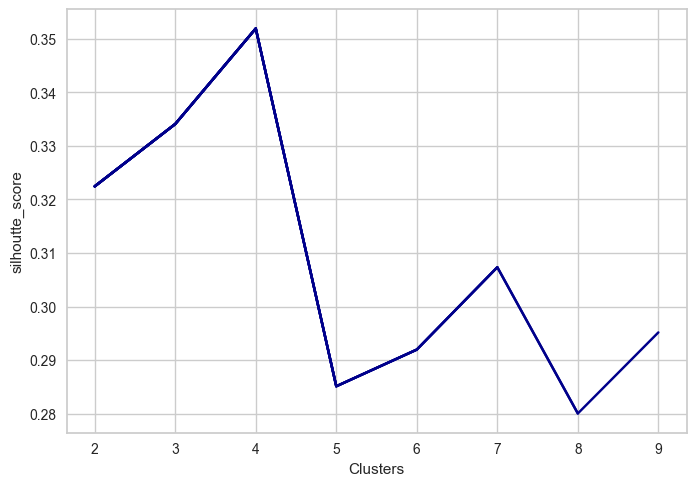

In [86]:
def plot_silhoutte_scores(components, upper_limit):
    silhouettes = []
    for k in range(2, upper_limit):
        kmeans = KMeans(n_clusters=k,random_state=1,init = 'k-means++', n_init= 30)
        cluster_assignments = kmeans.fit_predict(components)
        silhouettes.append(silhouette_score(components, cluster_assignments))
        plt.plot(range(2, k+1),silhouettes,color='darkblue')
        plt.xlabel("Clusters")
        plt.ylabel("silhoutte_score")
plot_silhoutte_scores(components,10)

The silhouette score plot indicates that 4 clusters has the highest score. Hence, I choose k = 4 for the k-Means clustering.

# 8.1.2 Silhouette Plot

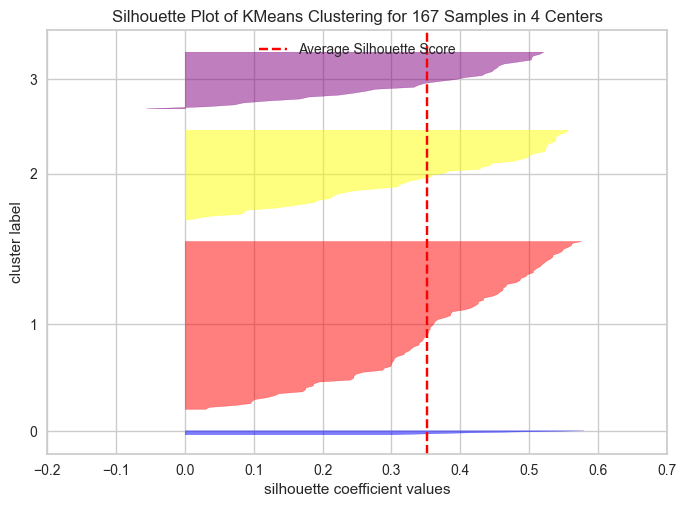

In [87]:
def KMeansParameters(n_clusters=2, random_state=100, n_init=20, max_iter=300, tol=0.0001): 
    return KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init, init='k-means++', max_iter=max_iter, tol=tol)

colours=["blue", "red", "yellow", "purple"]
kmeans = KMeansParameters(n_clusters=4)
cluster_assignments_kmeans=kmeans.fit_predict(components)

visualizer_B = SilhouetteVisualizer(kmeans, is_fitted = True, colors=colours)
visualizer_B.fit(components)
visualizer_B.finalize()

* This assessment suggests that the clusters are moderately structured, showing some separation between them with a score of 0.35. For the 4 clusters evaluated, their structure appears good, with silhouette scores above 0.5, indicating clear cluster distinctions. However, some instances have negative scores, suggesting potential cluster overlap or misclassifications.

In [88]:
random_state = 170

kmeans_pp = KMeans(
    n_clusters=4, 
    random_state=random_state, 
    n_init=20, 
    init='k-means++', 
    max_iter=300, tol=0.0001) 

X_array = components.values

cluster_assignments=kmeans_pp.fit_predict(X_array)

def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

k_means_report(kmeans_pp)

kmeans_pp.cluster_centers_

cluster_assignments

k-means 
 * has seen 4 features,
 * used 6 iterations, and 
 * resulted in an inertia of 514.1832635725247.


array([1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 1, 1, 3, 2, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1], dtype=int32)

In [89]:
df_cluster_kmeans = data2.copy().reset_index()
df_cluster_kmeans['cluster']  = cluster_assignments
df_cluster_kmeans.cluster.value_counts()

cluster
3    87
1    48
2    29
0     3
Name: count, dtype: int64

* Cluster 3 contains the most data points among all clusters, while Cluster 0 has the fewest, significantly less than the other three clusters.

* From this result, we can also observe that the output of the k-means algorithm before PCA is similar to the result after applying PCA. Only 2 countries change their assigned clusters.

In [90]:
df_cluster_kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


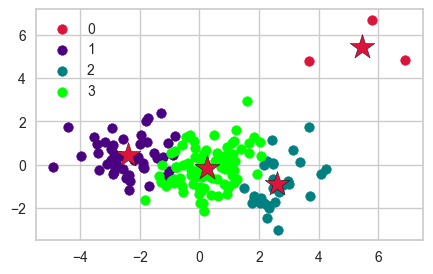

In [91]:
colors = ['crimson', 'indigo', 'teal', 'lime']

def print_clustering(X_array, kmeans, cluster_assignments):
    plt.figure(figsize=(5, 3))

#    for i in range(0,len(np.unique(cluster_assignments))):
    for i in np.unique(cluster_assignments):
        X_sub=X_array[cluster_assignments==i, :]
        plt.scatter(X_sub[:, 0], X_sub[:, 1], c=colors[i], label=i)
    
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
    )

    plt.legend()
    
print_clustering(X_array, kmeans_pp, cluster_assignments)

* Clusters 1, 2, and 3 seem to have formed effectively, exhibiting clear patterns. However, Cluster 0 appears somewhat noisy. Nonetheless, Cluster 0 could also be viewed as representing a particularly unique subset within the dataset.

# Cluster Interpretation

In [92]:
df_cluster_kmeans.set_index('country',inplace=True)


In [93]:
df_cluster_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3


I would like to see the average values of features within each cluster in order to compare results

In [94]:
cluster_means_kmeans = df_cluster_kmeans.groupby('cluster').mean()
cluster_means_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
1,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,4.982759,45.703448,9.245862,39.513793,45762.068966,2.727793,80.386207,1.814828,44065.517241
3,21.113793,41.291828,6.217241,47.636390,13297.586207,7.371506,73.147126,2.251954,7158.298851


It can be observed that some values in the data are negative. To avoid this, I'm using MinMaxScaler to ensure that all values are positive and fall within a specific range.

In [95]:
scaler_cluster_kmeans = MinMaxScaler(feature_range=(1, 10)) 
cluster_means_kmeans_sc = scaler_cluster_kmeans.fit_transform(cluster_means_kmeans)
cluster_means_kmeans_sc = pd.DataFrame(cluster_means_kmeans_sc, 
                                       index=cluster_means_kmeans.index, 
                                       columns=cluster_means_kmeans.columns)


<Axes: xlabel='cluster'>

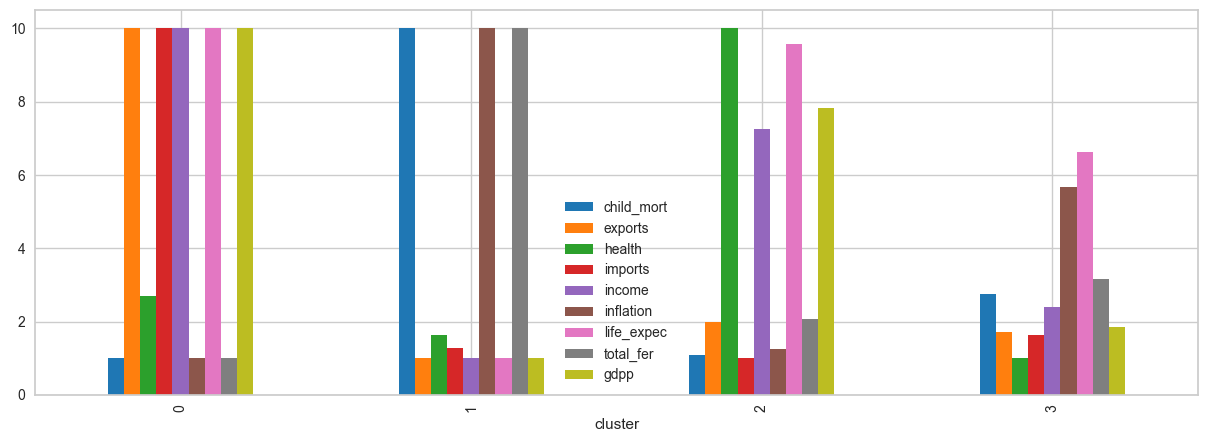

In [96]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
cluster_means_kmeans_sc.plot(kind='bar',figsize = (15,5),  color=colors)

# <b>Observations</b>


* After running the k-Means clustering, I found 4 distinct groups. Looking at the data and the graph, Cluster 1 stands out with the highest child mortality,inflation rates, and fertility rates,along with the lowest GDP. Its health situation is also quite poor compared to the other clusters. This cluster represents the poorest and least developed countries, needing urgent attention and support.


* The highest levels of GDP, income, life expectancy, exports, and imports are found in Cluster 0.It has the second highest health ranking among the clusters. Therefore, we can consider the countries in Cluster 3 to be the richest or most developed.

* Countries in Cluster 2 are less developed or wealthy than those in Cluster 0 but more developed or wealthy than those in Cluster 3.

As a consequence, I can categorize the group of countries according to the clusters as
* <b>Cluster 0-</b>the most developed 
* <b>Cluster 1-</b>the most undeveloped
* <b>Cluster 2-</b>developed
* <b>Cluster 3-</b>developing

I obtained similar clusters with different labels. Before PCA, the k-means algorithm yielded the following clusters:
* <b>Cluster 0-</b>the most undeveloped
* <b>Cluster 1-</b>developing
* <b>Cluster 2-</b>developed
* <b>Cluster 3-</b>the most developed

After applying PCA, the cluster labels were redefined as follows:

* <b>Cluster 0-</b>the most developed 
* <b>Cluster 1-</b>the most undeveloped
* <b>Cluster 2-</b>developed
* <b>Cluster 3-</b>developing


This re-labeling explains why the observations remain mostly similar across the two analyses.


In [97]:
df_cluster_kmeans.reset_index(inplace=True)

In [98]:
# For Cluster 1:
poorest_countries_kmeans = df_cluster_kmeans[df_cluster_kmeans.cluster == 1].sort_values(by =
                       ['child_mort','income', 'gdpp'], ascending = [False, True, True])
print('Top 10 countries those in need of help the most: ')
poorest_countries_kmeans[['country']].head(10)

Top 10 countries those in need of help the most: 


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


# <b>Task 9 – Conclusions and Future Work</b>


# Summarizing & The Interpretion of The Achived Result

* In conclusion, I found that the k-Means clustering method produces more accurate and interpretable clusters than hierarchical agglomerative clustering (HAC). Consequently, I opted for the results obtained from the k-Means clustering method as they align better with my objectives. 


* Furthermore, the results of the K-means algorithm were almost the same before and after applying PCA, likely because PCA retained 90% of the original data's variance. This high retention of variance ensured that the essential structure and patterns within the data were preserved, leading to similar clustering outcomes.

* The list of the top 10 countries needing the most help is based on Cluster 1 from the k-means Clustering method, which includes the following countries.Haiti,Sierra Leone,Chad,Central African Republic,Mali,Nigeria,Niger,Angola,Congo, Dem. Rep.,Burkina Faso






# <b>Comparing to the Original Plan (Task 1)</b>

* The WHO's CEO needed to carefully prioritize how to spend a substantial budget allocation in the most effective way. His primary concern in determining how to utilize the funds was selecting countries with the most urgent requirements for aid. Working together, he and his team determined that the budget would be best utilized by providing aid to the ten countries facing the most dire situations.My data science analysis revealed ten countries most in need of assistance. I provided this list for their consideration.

# <b>Explanation of the Generated Value</b>

* These countries stand out for their economic and social hardship, with the highest child mortality rates, the lowest levels of income, and the lowest GDPs compared to other nations.High child mortality, low income, and low GDP are strongly correlated with poverty, and the countries listed here demonstrate the most severe combination of these factors.

* We can explore using different combinations of the remaining dataset features to identify the top 15 countries needing the most attention. This alternative list can then be compared to the one I generated using child mortality rate, income level, and GDP.

* By using the clusters identified in Task 8, the organization could efficiently target countries facing the most urgent needs. This ensured the best possible use of the available funds.



# <b> Recommendation a Course of Action for the WHO</b>

* During the data exploration in Task 4, Myanmar as a potential candidate for assistance. Although it's not included in the extracted list, I recommend mentioning Myanmar to the CEO for further discussion.

* The analysis suggests a link between low income and child mortality. Therefore, I recommend to the WHO target its efforts towards countries with low income, where interventions can potentially have a significant impact on reducing child mortality

* In countries experiencing high fertility rates alongside low child mortality, I suggest social education programs as a key intervention.  By promoting family planning and the advantages of smaller families, these programs could empower individuals to make informed choices about their reproductive health, ultimately improving child well-being.


# <b>Limitations and Possible Pitfalls</b>

* The K-means algorithm, while effectively identifying 10 countries potentially requiring urgent aid through clustering, has several limitations that should be acknowledged. These include sensitivity to initial centroids, reliance on assumptions about data distribution, and challenges in interpreting clusters without domain knowledge. Additionally, issues such as outlier sensitivity and the need to select an optimal number of clusters can impact the reliability and robustness of the results.Addressing these limitations through careful consideration of data quality, alternative algorithms, and validation techniques is essential for ensuring the validity and utility of the analysis.

# <b>Discsusing Employed Methodology</b>

K-means is known for its scalability and efficiency when handling large datasets, which makes it well-suited for analyzing a significant amount of country data to identify patterns or clusters. The utilization of both the elbow method and silhouette analysis for determining the optimal number of clusters reflects a robust effort to ensure the reliability of the clustering process. Visualizing feature values for each cluster through bar graphs enhances the interpretation of cluster characteristics and aids in aligning clusters with specific categories or groups. Furthermore, I would like to explore alternative clustering algorithms, such as DBSCAN, which might have provided complementary insights or revealed different patterns in the data.

# <b>Purpose Ideas for Future Work</b>

* Investing a significant portion of the funds in social and educational programs alongside healthcare infrastructure appears most beneficial. Socially educated populations often demonstrate greater awareness of family planning, potentially leading to a decrease in fertility rates. Additionally, a robust healthcare system can reduce child mortality and increase life expectancy, ultimately contributing to a healthier and more sustainable future.